In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#reading data
df  = pd.read_csv('head_brain.csv')
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [2]:
df.shape

(237, 4)

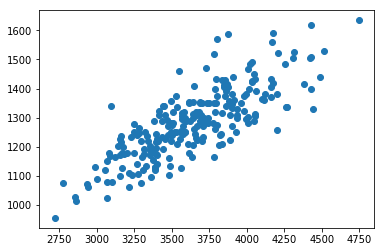

In [3]:
##Here we can find a linear regression between head size and brain weight
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values
plt.scatter(X,y)

In [4]:
#Mean of X and y
mean_x = np.mean(X)
mean_y = np.mean(y)

#total number of values
n = len(X)

#using the formula to calculate b1 and b0
number =0
denom=0
for i in range(n):
    number += (X[i] - mean_x)*(y[i] - mean_y)
    denom += (X[i]-mean_x)**2
b1 = number/denom
b0 = mean_y - (b1 * mean_x)
print(b1,b0)

0.26342933948939945 325.57342104944223


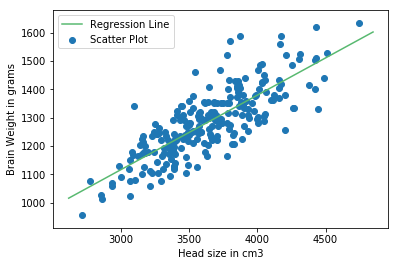

In [10]:
max_x = np.max(X)+100
min_x = np.min(X)-100

x = np.linspace(min_x,max_x,1000)
Y  = b0+b1*x
#print(X)
plt.plot(x,Y,color="#58b970",label="Regression Line")
plt.scatter(X,y,label="Scatter Plot")

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [13]:
#use r sqaure method to calculate how good our model

ss_r=0
ss_t=0
for i in range(n):
    y_prid = b0+b1*X[i]
    ss_r += (y[i]-y_prid)**2
    ss_t += (y[i]-mean_y)**2
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [16]:
##using sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##cannot use rank 1 matrix in scikit learn 
#print(X)
X = X.reshape((n,1))
#print(X)
reg = LinearRegression()
reg = reg.fit(X,y)
y_pred = reg.predict(X)

r2_score = reg.score(X,y)
print(r2_score)

0.639311719957
